In [1]:
from typing import Annotated
from dotenv import load_dotenv
load_dotenv()

True

In [4]:
from typing_extensions import TypedDict
from langchain.chat_models import init_chat_model

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import  add_messages

In [5]:
llm = init_chat_model("google_genai:gemini-2.0-flash")

In [7]:
class State(TypedDict):
    messages: Annotated[list, add_messages]
    

def chatbot(state : State) -> State:
    return {"messages": llm.invoke(state["messages"])}

In [9]:
builder = StateGraph(State)
builder.add_node("chat_node", chatbot)

builder.add_edge(START, "chat_node")
builder.add_edge("chat_node",  END)

graph = builder.compile()

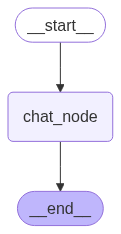

In [10]:
from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

In [11]:
message = {"role": "user", "content": "Who walked on the moon for the first time? Print only the name"}
response = graph.invoke({"messages":[message]})
response["messages"]

[HumanMessage(content='Who walked on the moon for the first time? Print only the name', additional_kwargs={}, response_metadata={}, id='38742b77-b1e7-4ae1-a3b5-bf0e7f92afc7'),
 AIMessage(content='Neil Armstrong', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.0-flash', 'safety_ratings': []}, id='run--1749b80e-4798-49ea-8356-af959f170bf0-0', usage_metadata={'input_tokens': 14, 'output_tokens': 3, 'total_tokens': 17, 'input_token_details': {'cache_read': 0}})]

In [15]:
state = None
while True:
    in_message = input("User > ")
    print("User > ", in_message)
    if in_message.lower() in {"quit", "exit"}:
        break

    if state is None:
        state: State = {
            "messages": [{
                "role": "user",
                "content": in_message
            }],
        }
    else:
        state["messages"].append({"role": "user", "content": in_message})
    
    state = graph.invoke(state)
    print("Bot > ", state["messages"][-1].content)     

User >  Hi
Bot >  Hi there! How can I help you today?
User >  How are you?
Bot >  As a large language model, I don't experience feelings in the same way humans do. However, I am functioning optimally and ready to assist you with your requests! Thanks for asking. How are you doing?
User >  who is the first person who landed on moon?
Bot >  The first person to land on the moon was **Neil Armstrong**. He took his first step on the lunar surface on July 20, 1969.
User >  quit
